In [1]:
import pycbc
import matplotlib
%matplotlib inline

/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py37/lib/python3.7/site-packages/IPython/core/pylabtools.py:131: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


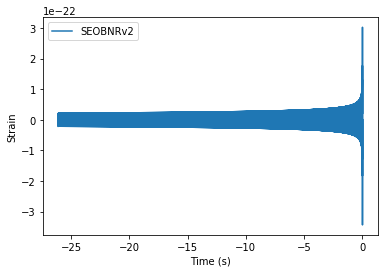

In [2]:
import pylab
from pycbc.waveform import get_td_waveform

apx = 'SEOBNRv2'
dist = 85.493584 
phase = -2.0127285
m1 = 1.5270051
m2 = 1.2422962
spin1z = -0.015901944
spin2z = -0.035747342

#help(get_td_waveform)

hp, hc = get_td_waveform(approximant=apx,
                                     mass1=m1,
                                     mass2=m2,
                                     spin1z=spin1z,
                                     spin2z = spin2z,
                                     delta_t=1.0/16384,
                                     distance = dist,
                                     f_lower=40
                            )

pylab.plot(hp.sample_times, hp, label=apx)

pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.show()




In [3]:
# -- output to table
import numpy as np

data = np.array(list(zip(hp.sample_times, hp)))
print(data)

np.savetxt('waveform.txt',data)
    

[[-2.61085454e+01 -2.14744515e-23]
 [-2.61084843e+01 -2.14603120e-23]
 [-2.61084233e+01 -2.14411228e-23]
 ...
 [ 4.43071922e-03 -0.00000000e+00]
 [ 4.49175437e-03 -0.00000000e+00]
 [ 4.55278953e-03 -0.00000000e+00]]


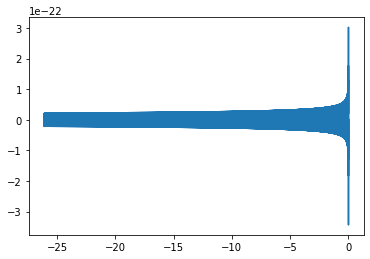

In [4]:
time, strain = np.loadtxt('waveform.txt', unpack=True)

pylab.plot(time, strain)